In [11]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math

gostota_zraka = 1.2

# frekvenca, n, polovica valovne dolzine
meritve = [
    [146, 1, None],
    [300, 2, 0.45],
    [460, 3, 0.4],
    [620, 4, 0.3],
    [780, 5, 0.25],
    [940, 6, 0.2],
    [1100, 7, 0.15],
    [1260, 8, None],
    [1420, None, None],
    [1580, None, None],
    [1740, None, None],
    [1900, None, None],
    [2060, None, None]    
]

hitrosti = [
    m[0]*m[2]*2 if None not in m else None for m in meritve
]

print('frekvenca', 'n', 'valovna dolzina / 2', 'c', sep='\t')
for i in range(len(meritve)):
    print(str(meritve[i][0])+'\t', meritve[i][1], str(meritve[i][2]) + '\t\t', None if hitrosti[i] is None else round(hitrosti[i], 2), sep='\t')
    
povprecna = sum([i for i in hitrosti if i is not None])/len([i for i in hitrosti if i is not None])
print('\n\npovprecna hitrost zvoka:', round(povprecna, 2), 'm/s')

stisljivost = 1/(povprecna**2 * gostota_zraka)
print('adiabatna stisljivost zraka:', stisljivost, 's^2 m kg^-1')


frekvenca	n	valovna dolzina / 2	c
146		1	None			None
300		2	0.45			270.0
460		3	0.4			368.0
620		4	0.3			372.0
780		5	0.25			390.0
940		6	0.2			376.0
1100		7	0.15			330.0
1260		8	None			None
1420		None	None			None
1580		None	None			None
1740		None	None			None
1900		None	None			None
2060		None	None			None


povprecna hitrost zvoka: 351.0 m/s
adiabatna stisljivost zraka: 6.764014361355293e-06 s^2 m kg^-1


k: 160.0
n: -20.0


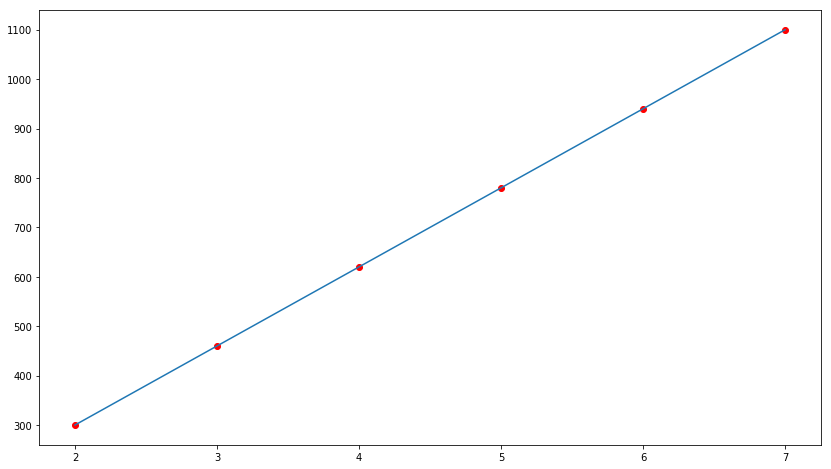

In [32]:
x = [i[1] for i in meritve if None not in i]
y = [i[0] for i in meritve if None not in i]
plt.figure(figsize=(14, 8))
plt.plot(x, y, 'ro')

A = np.vstack([x, np.ones(len(x))]).T
k, n = np.linalg.lstsq(A, y)[0]
yfit = [k * xi + n for xi in x]
plt.plot(x, yfit)
print('k:', k)
print('n:', n)